In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.image as mpimg
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import PIL
import torch
from torch import nn

In [3]:
path = r'C:\Users\james\Documents\dissertation_seg_data'

input_path = os.path.join(path,"input")

mask_path = os.path.join(path,"mask")

train_split = 0.8

In [5]:
image_input_path = sorted([ os.path.join(input_path, fname) for fname in os.listdir(input_path)])

image_input_path

image_mask_path = sorted([ os.path.join(mask_path, fname) for fname in os.listdir(mask_path)])

image_mask_path

1307

In [28]:
input_array = np.zeros((len(image_input_path), 512,512,3))

mask_array = np.zeros((len(image_mask_path), 512,512))

for image in range(len(image_input_path)):
    inp_path = image_input_path[image]
    img = PIL.Image.open(inp_path)
    img = np.array(img.crop((0,0,512,512)))
    img = (np.array(img / 255))
    input_array[image] = img
    
    mask_path = image_mask_path[image]
    img= PIL.Image.open(mask_path)
    img = img.crop((0,0,512,512))
    img = PIL.ImageOps.grayscale(img)
    mask_array[image] = img
    print(image)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


KeyboardInterrupt: 

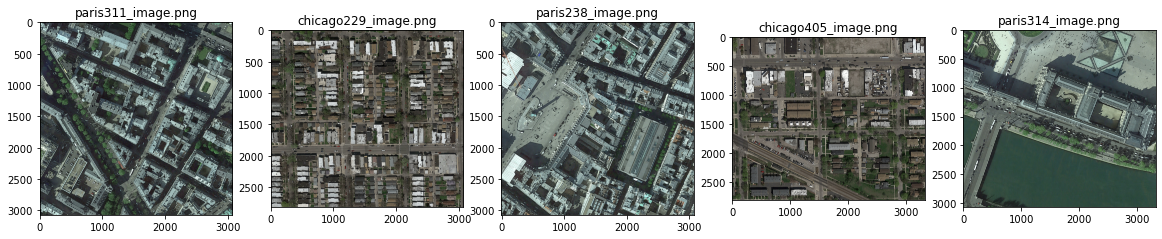

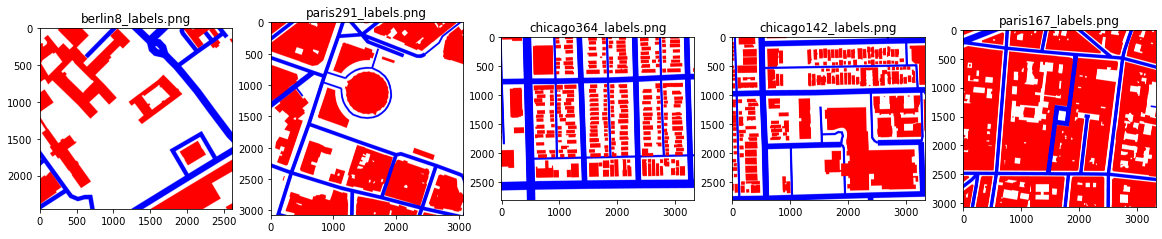

In [17]:

def show_data(directory):
    plt.figure(figsize=(20,20))
    for i in range(5):
        file = random.choice(os.listdir(directory))
        image_path= os.path.join(directory, file)
        img=PIL.Image.open(image_path)
        ax=plt.subplot(1,5,i+1)
        ax.title.set_text(file)
        plt.imshow(img)

show_data(input_path)

show_data(mask_path)

In [ ]:
from PIL 
class SatelliteDataset(Dataset):

    def __init__(self, input_path, mask_path, image_loc):
        self.input_path = input_path
        self.mask_path = mask_path
        self.image_loc = image_loc

    def __getpair__(idx):
        input = PIL.Image.open(self.input_path + self.image_loc[i] + '.jpg')
        input = input.convert("RGB")
        mask = PIL.Image.open(self.mask_path + self.mask_path[i] + '.jpg')
        mask = PIL.ImageOps.grayscale(mask)

    def tiles(self, img, mask):

        img_patches = img.unfold(1, 512, 512).unfold(2, 768, 768) 
        img_patches  = img_patches.contiguous().view(3,-1, 512, 768) 
        img_patches = img_patches.permute(1,0,2,3)
        
        mask_patches = mask.unfold(0, 512, 512).unfold(1, 768, 768)
        mask_patches = mask_patches.contiguous().view(-1, 512, 768)
        
